# CURSO DE POSGRADO
# INTELIGENCIA ARTIFICIAL APLICADA A CIENCIAS DE LA SALUD

#### **Universidad Nacional del Litoral** 
![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/4342118729.png)

# **Módulo 3**
# **Machine Learning**
![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/9211016956.png)

#### **Bibliografia recomendada**
1) Peter Bruce, Andrew Bruce, Peter Gedeck - Practical Statistics for Data Scientists_ 50+ Essential Concepts Using R and Python-O'Reilly Media (2020)

#### Links recomendados
- https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/


![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/9128354678.png)

# **Aprendizaje no supervisado**
![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/5924889315.png)

## Tipos de Aprendizaje No Supervisado
- Clustering: Agrupar datos similares.
- Reducción de Dimensionalidad: Simplificar los datos sin perder características importantes.
- Detección de Anomalías: Identificar 'outliers' o anomalías en los datos.

Clustering es útil en una variedad de aplicaciones:

- Segmentación de mercado: Identificar grupos de clientes con comportamientos de compra similares.
- Análisis de redes sociales: Encontrar comunidades dentro de grandes redes de interacción.
- Detección de anomalías: Un "cluster" de un solo elemento podría ser considerado como una anomalía.
- Compresión de datos: Agrupar datos similares para su representación compacta.


### Medidas de Similitud
El concepto de "similitud" varía según el tipo de datos y el dominio de aplicación. Algunas medidas comunes incluyen:

- Distancia Euclidiana: Para datos numéricos.
- Similitud de Jaccard: Para datos categóricos o binarios.
- Similitud coseno: Útil en procesamiento de texto para comparar vectores de palabras.

### `Clustering`

Existen varios algoritmos de clustering, y estos se pueden clasificar en diferentes categorías:

- Clustering Partitivo: Algoritmos como K-Means que dividen el conjunto de datos en grupos separados.
- Clustering Jerárquico: Crea una jerarquía o árbol de clusters.
- Clustering Basado en Densidad: Como DBSCAN, donde se forman clusters en base a la densidad de los puntos.


### Definición y Diferencias Clave
Mientras que en el aprendizaje supervisado tenemos una 'respuesta correcta' (label) para cada ejemplo en nuestro conjunto de entrenamiento, en el aprendizaje no supervisado no tenemos tales etiquetas. 

El objetivo aquí es explorar la estructura inherente de los datos. En otras palabras, estamos permitiendo que el modelo trabaje en el conjunto de datos por sí mismo para descubrir información que podría no ser visible para el ojo humano.

En muchas situaciones del mundo real, etiquetar datos puede ser costoso o impracticable. Además, el aprendizaje no supervisado puede descubrir patrones en los datos que ni siquiera sabíamos que estaban allí.

## Antes de empezar: `normalizar los datos`
**¿Por qué hay que preprocesar los datos antes de hacer clustering?
- Las variables pueden tener unidades diferentes (cm, precio, mmHg, etc)
- Las variables con misma unidad pueden tener diferentes escalas y varianzas
- No hacer un ajuste de eso puede generar sesgo o que el clustering dependa exclusivamente de una sola variable. 

## CONTENIDO A VER:
1) Clustering con K-means y DBScan
2) Hierarchy
3) Flechitas...

# `Clustering`

## `Clustering partitivo`

### *`K-means`*

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) de K-means.

K-Means es el algoritmo de clustering más popular debido a su simplicidad y eficiencia. Aquí hay un resumen rápido de cómo funciona:

K-means paso a paso: 

* 1- Nosotros establecemos el número de centroides (puntos centrales o "K") iniciales con los cuales queremos "segmentar".
* 2- Asignación de Clusters: Se asigna cada punto al cluster cuyo centroide está más cercano.
* 3- Actualización de Centroides: Calcula el punto medio de todos los puntos en cada cluster y establece ese punto medio como el nuevo centroide.
* 4- Iteración: Repite los pasos 2 y 3 hasta que los centroides ya no cambien significativamente.

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/5522449322.png)

#### `Ventajas`
- Facil de usar e interpretar
- Eficiente para usar en grandes datasets

#### `Desventajas`
- `El número óptimo de clústeres es nuestra decisión.` Hay un método sencillo para ayudar a decidirnos pero siempre hay que conocer los datos, su distribución, limitaciones y utilidad/objetivos para que nuestros clústeres "tengan sentido". 
- Impacto de las semillas (seed). Siempre settear la semilla para obtener resultados reproducibles.
- El algoritmo siempre va a tender a generar clústeres de tamaño similar. Si nuestros "clústeres teóricos" están muy desbalanceados, conviene usar otro método. 

![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/2281819471.png)


#### Iris dataset, segmentación paso a paso

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

data = pd.read_csv('./databases/iris.csv')

data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


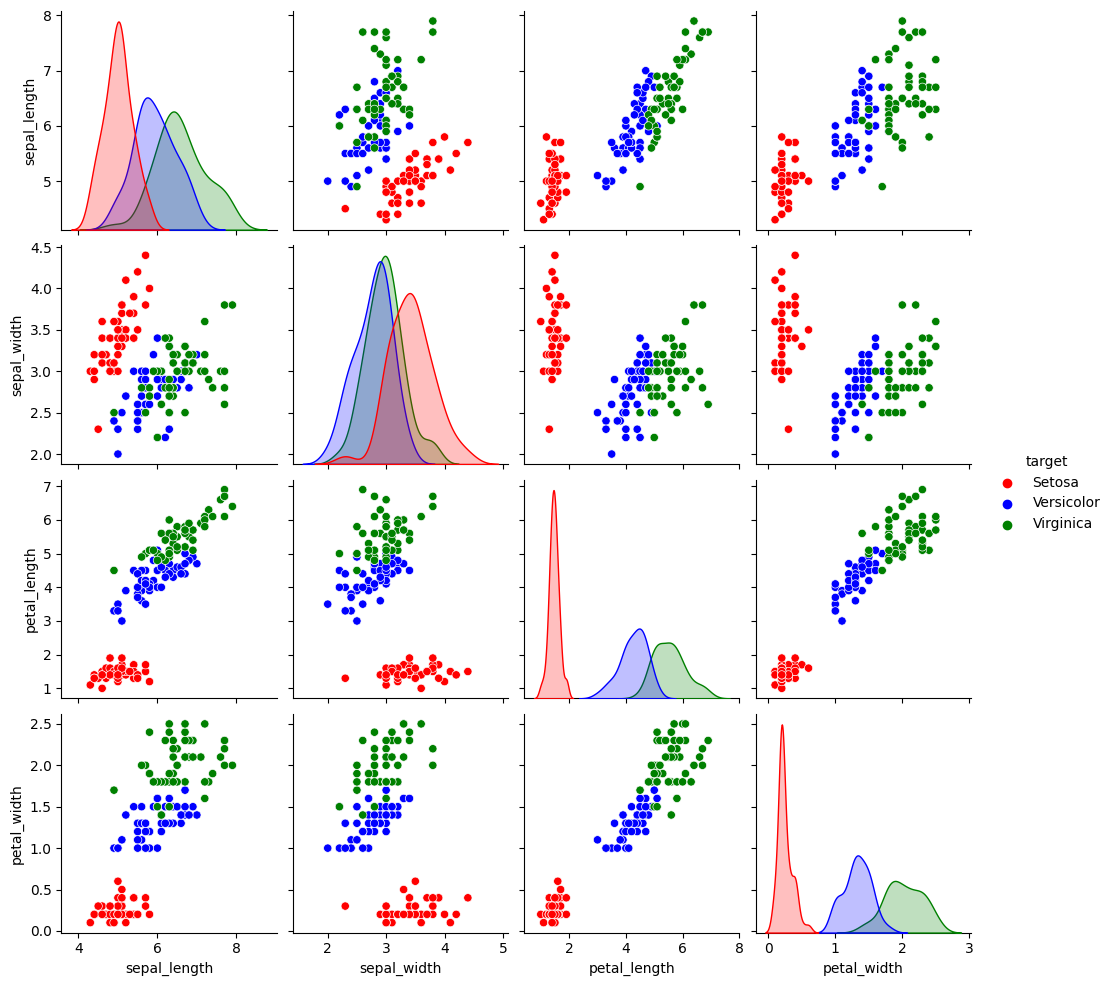

In [2]:
sns.pairplot(data, hue="target", palette = ['r', 'b', 'g'])
plt.show()

Dejamos solo las features, eliminamos las etiquetas del dataframe, ya que queremos que el algoritmo aprenda "solito" a segmentar e identificar patrones. 

In [44]:
features = data.iloc[:,0:4]
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


/Users/maico/miniconda3/envs/unl/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


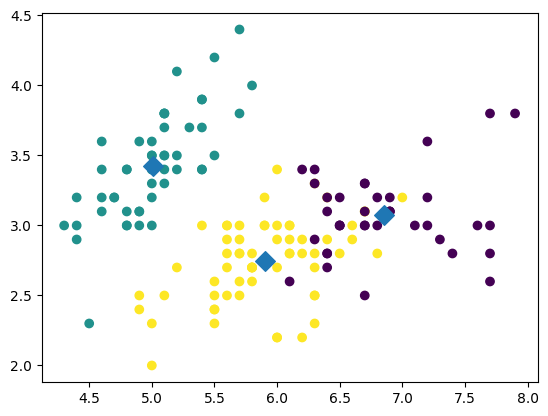

In [5]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(features)

labels = model.predict(features)
print(labels)

import matplotlib.pyplot as plt
xs = data.iloc[:,0]
ys = data.iloc[:,1]
plt.scatter(xs, ys, c=labels)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y,  marker = 'D', s= 100)
plt.show()

### ¿Como determinar el número óptimo de clusteres? 

Esto es una decisión que hay que tomar interpretando gráficos y según nuestro entendimiento de los datos y su origen.

Un método sencillo para evaluar el número óptimo de clústeres es el "método del codo" (Elbow Method en inglés)

### Elbow Method:
Antes de aplicar K-Means, necesitamos determinar el número óptimo de clusters.

Vamos a calcular la suma de las distancias al cuadrado desde cada punto hasta su centroide asignado para un rango de valores de K y graficarlos. 

**No hay un número correcto de clústeres, siempre hay que adaptarlo a la necesidad de lo que queramos hacer con los datos.**

¿Que son las distorsiones? 
- Es la suma de los cuadrados de la distancia al centro del cluster. 
- A mayor número de clusteres, menor es la suma.
- Si mi numero de clusters = número puntos, esta suma da cero. 

![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/1061475877.png)

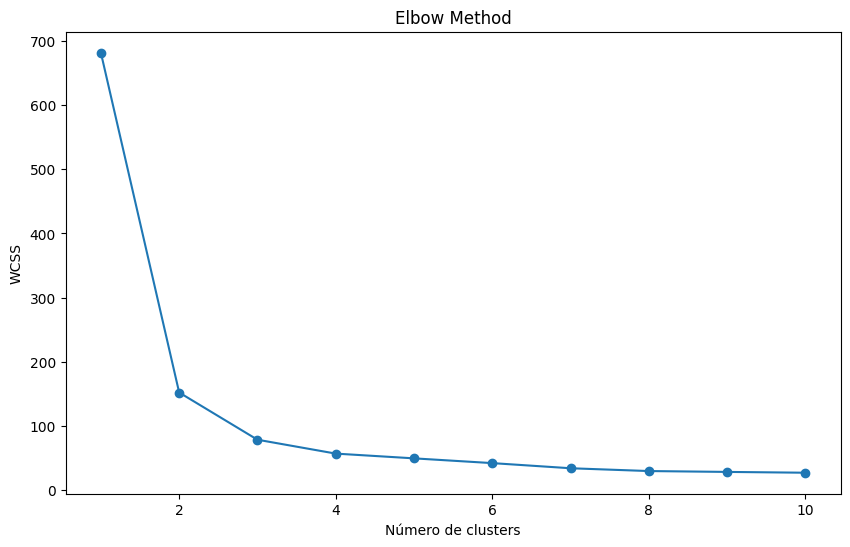

In [11]:
# Calcular la suma de las distancias al cuadrado (WCSS) para varios valores de K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init='auto')
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()


No escalamos los datos...¿Por qué?

/Users/maico/miniconda3/envs/unl/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


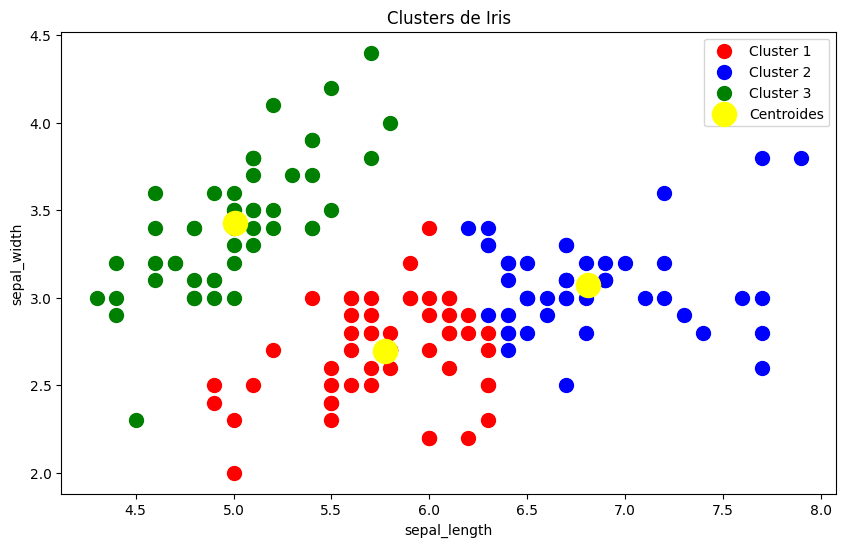

In [12]:
# Aplicar K-Means con K=3
X = features.iloc[:, :2].values

kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Graficar los clusters en un scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

# Dibujar los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroides')

plt.title('Clusters de Iris')
plt.xlabel(features.columns.tolist()[0])
plt.ylabel(features.columns.tolist()[1])
plt.legend()
plt.show()


## `Clustering jerarquico`: 

### Definición y Conceptos Básicos
El clustering jerárquico es un método de agrupamiento que busca construir una jerarquía de clústeres. A diferencia de los algoritmos de agrupamiento "planos" como k-means, donde cada punto pertenece a un solo clúster, el clustering jerárquico permite una estructura más compleja y anidada.


### Tipos de Clustering Jerárquico: Aglomerativo y Divisivo
Clustering Aglomerativo: Este es el enfoque más común. Empezás con cada punto como un clúster individual y luego, en cada iteración, unes los dos clústeres más cercanos en uno nuevo. Este proceso se repite hasta que todos los puntos forman un único clúster.

Clustering Divisivo: Aquí empezás con un único clúster que contiene todos los puntos. Luego, en cada paso, divides el clúster más 'divisible' en dos clústeres más pequeños, hasta que cada punto termina siendo su propio clúster.

`Ventajas`
- Estructura jerárquica: Proporciona una estructura de árbol que puede ser muy informativa, permitiéndote entender la estructura anidada en tus datos.

- No es necesario especificar el número de clústeres de antemano: Aunque esto puede hacerse cortando el dendrograma a una cierta altura, no es un requisito previo como en k-means.

- Flexibilidad con diferentes métricas: Puedes usar diferentes métricas de distancia y métodos de enlace, lo que hace que el método sea muy flexible.

`Desventajas`
- Complejidad computacional: Es más computacionalmente demandante que otros métodos como K-means. No es adecuado para grandes conjuntos de datos.

- Sensibilidad a la elección del método de enlace y la métrica de distancia: Una mala elección puede llevar a resultados poco intuitivos.

### Dendogramas

Los dendrogramas son una herramienta especialmente relevante en el contexto de clustering jerárquico. A diferencia del clustering partitivo, como K-Means, donde se asignan puntos a un número fijo de clusters desde el principio, el clustering jerárquico busca construir una jerarquía de clusters.

### ¿Qué es un Dendrograma?
Un dendrograma es un diagrama de árbol que muestra la disposición de los clusters formados por el algoritmo de clustering jerárquico. Cada hoja del árbol representa un punto de datos y cada nivel del árbol representa una posible agrupación. Las ramas del árbol se pueden cortar a diferentes alturas para obtener diferentes agrupaciones, lo cual es útil para determinar el número óptimo de clusters.

#### Características y Usos
Visualización de Jerarquía: Los dendrogramas muestran de manera clara y compacta la jerarquía de clusters y cómo los datos están organizados a diferentes niveles de similitud.

#### Determinación del Número de Clusters: 
Aunque hay otros métodos para determinar el número óptimo de clusters, como el método del codo para K-Means, el dendrograma permite hacer esto de una manera más visual. Podes decidir cortar el árbol en un punto que te dé un número razonable de clusters grandes.

#### Análisis de Estructura de Datos: 
El dendrograma también puede revelar la estructura y relaciones inherentes en los datos, lo cual podría no ser visible a través de otros métodos de clustering.

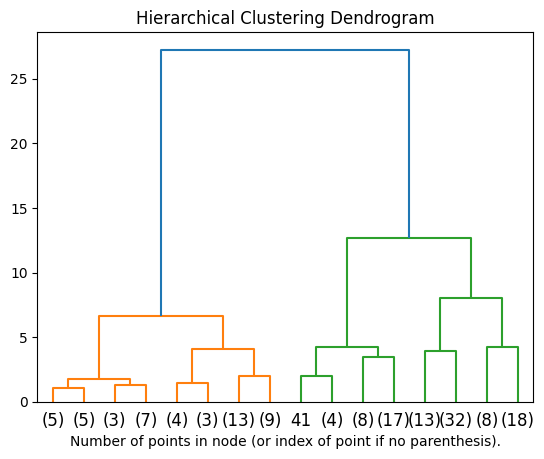

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features.values)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, 
                                n_clusters=None, 
                                linkage='ward', #‘ward’, ‘complete’, ‘average’, ‘single’
                                metric='euclidean') #“euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”.

model = model.fit(scaled_data)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

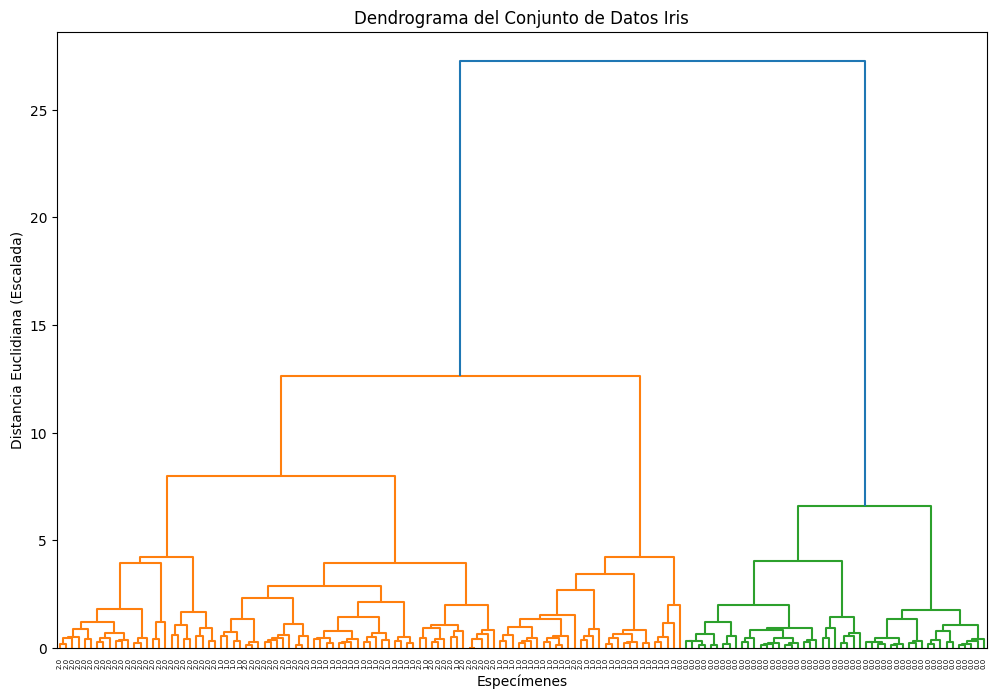

In [9]:
linked = linkage(scaled_data, 'ward') # 'ward' es el método de enlace, que minimiza la varianza entre los clusters.

plt.figure(figsize=(12, 8))
dendrogram(linked,
        orientation='top',
        labels=list(data['target']),
        distance_sort='descending',
        show_leaf_counts=True)
plt.title('Dendrograma del Conjunto de Datos Iris')
plt.xlabel('Especímenes')
plt.ylabel('Distancia Euclidiana (Escalada)')
plt.show()

### Métodos de Enlace (Linkage Methods)

- **Enlace Simple**: Puede dar lugar a clústeres "encadenados", donde los elementos en el mismo clúster pueden estar muy alejados entre sí.
- **Enlace Completo**: Tiende a crear clústeres más compactos y bien separados.
- **Enlace Promedio**: Ofrece un compromiso entre el enlace simple y el enlace completo, y a menudo produce resultados más "naturales" en varios tipos de datos.
- **Enlace de Ward**: Tiende a crear clústeres del mismo tamaño y es especialmente útil cuando las diferencias de tamaño de los clústeres son importantes.

### Distancias en Clustering Jerárquico

La elección de la métrica de distancia es crucial en el clustering jerárquico porque determina cómo se calcula la "cercanía" entre diferentes puntos o clústeres.

#### Distancia Euclidiana

La distancia euclidiana es probablemente la métrica de distancia más utilizada en análisis de clustering. Es la "distancia en línea recta" entre dos puntos en un espacio euclidiano. La fórmula para calcular la distancia euclidiana entre dos puntos \( A \) y \( B \) en un espacio \( n \)-dimensional es:

$$
\text{Distancia Euclidiana} = \sqrt{\sum_{i=1}^{n} (A_i - B_i)^2}
$$


![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/1697819862105.png)


Es muy intuitiva y facil de calcular, pero no funciona muy bien cuando tenemos muchas columnas (dimensionalidad alta!). 
Siempre que tratamos distancias....`NORMALIZAR`

#### Otras Métricas de Distancia

- **Distancia Manhattan (o de ciudad)**: Suma de las diferencias absolutas entre las coordenadas.
- **Distancia de Minkowski**: Generalización de las distancias euclidiana y Manhattan.
- **Distancia del coseno**: Mide el ángulo entre dos vectores, útil cuando la orientación importa más que la magnitud.
- **Distancia de Jaccard**: Útil para comparar conjuntos, mide la similitud entre dos conjuntos como la intersección dividida por la unión de los conjuntos. Se usa en segmentación en redes neuronales convolucionales. 

## `Clustering Basado en Densidad`

En lugar de agrupar en función de la distancia entre puntos o entre clústeres, este método agrupa puntos en función de la densidad de puntos en una región.

#### DBSCAN: Density-Based Spatial Clustering

La mejor forma de entenderlo es con este grafico visual: 

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/


La idea es que si un punto pertenece a un cluster, probablemente haya muchos puntos cercanos a este punto. 

Para eso tenemos que settear dos parámetros: 
- La cantidad de puntos mínimos para considerar en nuestro cluster, `minPoints`.
- La distancia mínima que habrá en nuestros puntos, `epsilon`

Si elegimos `minPoints` de 4, el algoritmo va a considerar que para ese punto, si hay 4 puntos cercanos a este (definidos por distancia menor a `epsilon`), entonces, pertenece al mismo cluster. 

Esto se hace de forma recursiva para todos los puntos. 

Algunos puntos no cumplen ninguno de nuestros requisitos: no hay 4 o más cerca de la distancia mínima. Esos puntos son considerados `ruido`. 

Por lo tanto, este algoritmo es bueno para datos con ruido y valores atípicos, pero que es considerado ruido o atípico dependera de `minPoints` y `epsilon`.

![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/1697819756668.png)

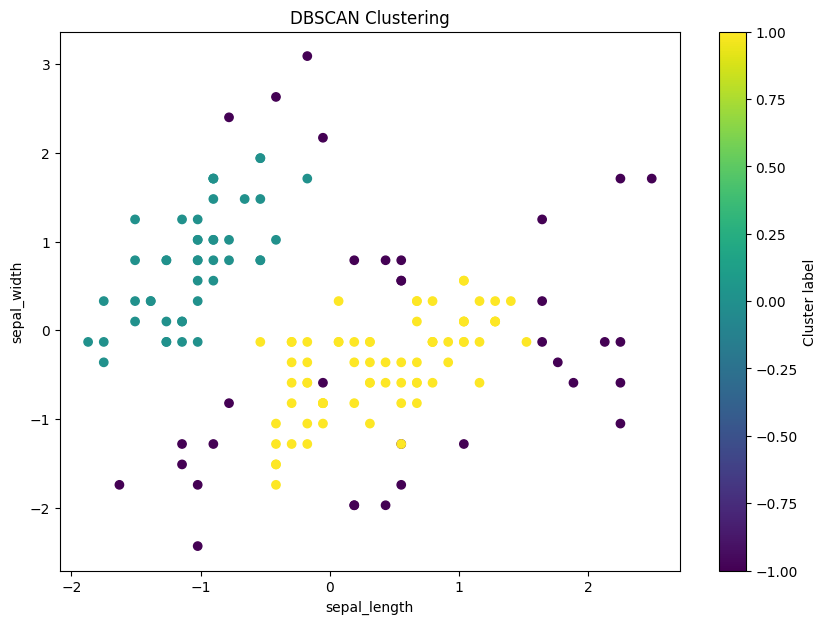

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
from sklearn.cluster import DBSCAN

# Crear el objeto DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Ajustar el modelo
clusters = dbscan.fit_predict(scaled_data)

# Visualizar los resultados
plt.figure(figsize=(10, 7))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel(features.columns.tolist()[0])
plt.ylabel(features.columns.tolist()[1])
plt.colorbar(label='Cluster label')
plt.show()

# Mostrar las primeras 10 etiquetas de clústeres
clusters[:10]

### SON MUCHOS ALGORITMOS, ¿CUAL ELEGIR?

![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/1697820108929.png)

# `Reducción de dimensionalidad`

La reducción de dimensionalidad es el proceso de transformar los datos originales que existen en un espacio de alta dimensión a un espacio de menor dimensión, de tal manera que se retenga la mayor cantidad posible de información relevante. 

**Utilidad**:

- **Facilitar la Visualización**: Es difícil visualizar y entender datos en dimensiones superiores a tres. La reducción de dimensionalidad puede ayudar a representar estos datos en dos o tres dimensiones.
  
- **Enfocar en lo Importante**: Muchas veces, no todas las dimensiones son igualmente informativas. La reducción de dimensionalidad puede ayudar a mantener solo las características más importantes.

## `Análisis de Componentes Principales (PCA)`

PCA es una técnica de reducción de dimensionalidad que busca proyectar los puntos de datos originales en direcciones (componentes principales) donde la variabilidad de los datos es máxima.

Se utiliza para enfatizar la variación y sacar patrones fuertes en un conjunto de datos. Su objetivo principal es reducir la dimensionalidad del conjunto de datos, resumiendo la información en menos variables (componentes principales), de manera que se retenga la mayor cantidad posible de la variabilidad original.

Entender su lógica de cálculo requiere prácticar con matrices y calculo de autovectores. Si bien es relativamente sencillo, requeriría un par de clases de práctica entenderlo. 

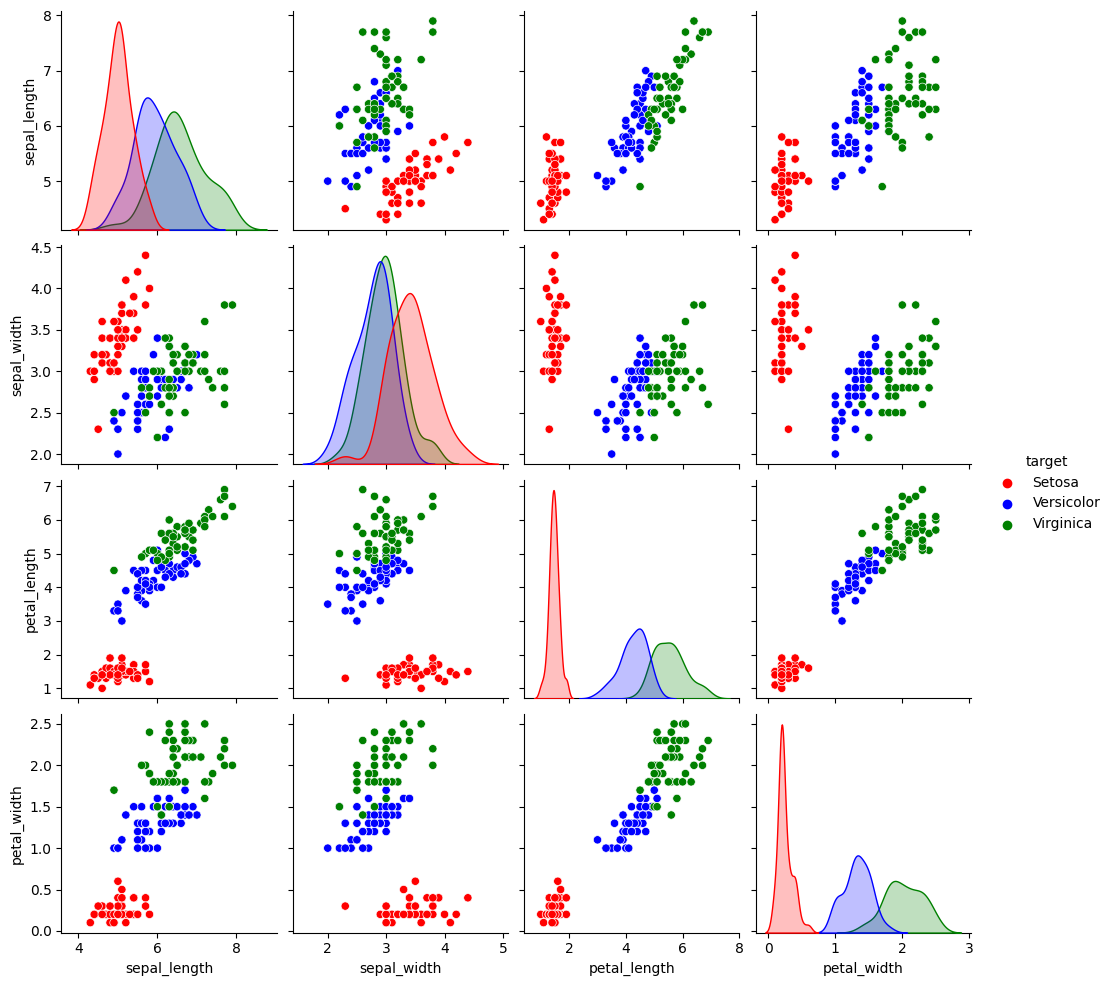

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.pairplot(data, hue="target", palette = ['r', 'b', 'g'])
plt.show()

In [21]:
import scipy.stats as stat

def plot_hists(data, target, feature, num_bins):
    counts = data[target].value_counts()
    fig, ax = plt.subplots(1, 3, figsize = [12, 4], sharey=True)
    for axis, index in zip(ax, counts.index):
        column = data[data[target]==index][feature]
        n, bins, patches = axis.hist(column, num_bins, density=True, edgecolor='black')
        #print(bins)
        mean = column.mean()
        std = column.std()
        axis.axvline(mean, color='#444444', label='Mean', linewidth=2)
        y = stat.norm.pdf(bins, mean, std)
        axis.plot(bins, y, '--')
        title = index + (' mu=%.2f'% mean)
        axis.set_title(title)

    #plt.tight_layout()
    plt.suptitle('Histogramas de ' + feature, fontsize=16)
    plt.show()

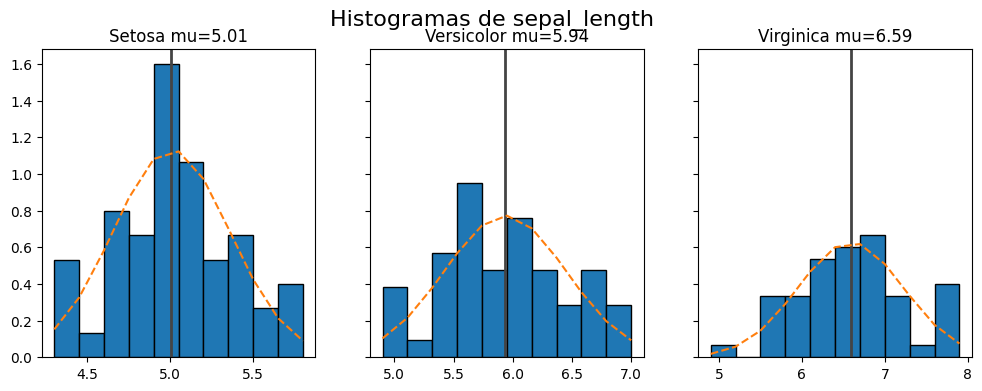

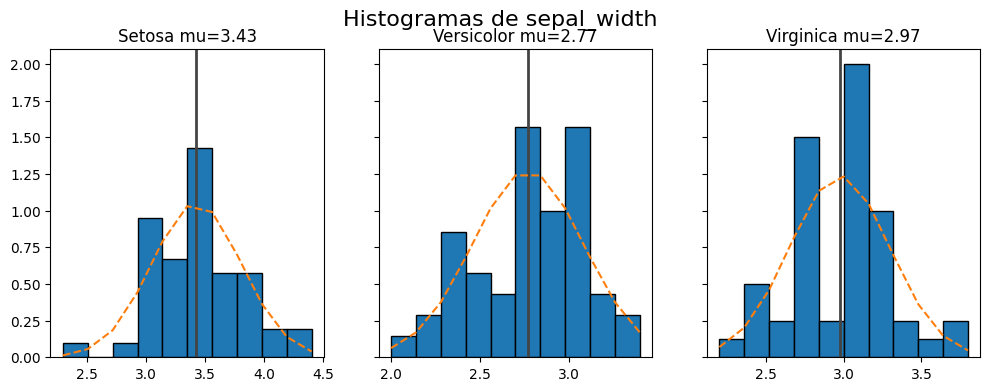

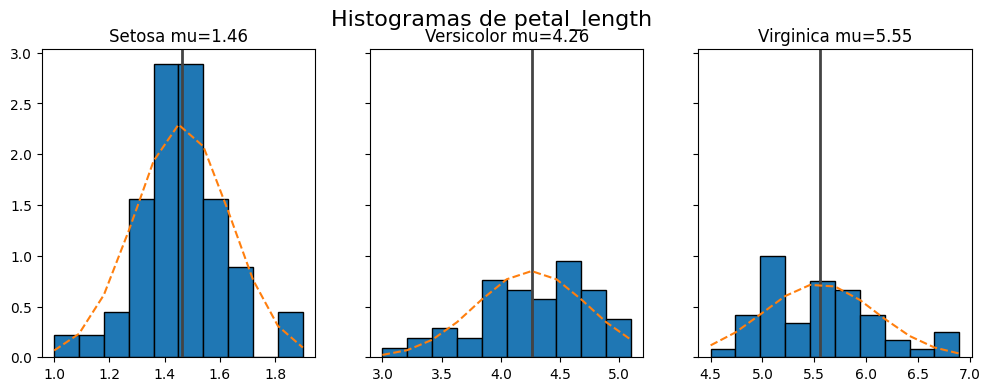

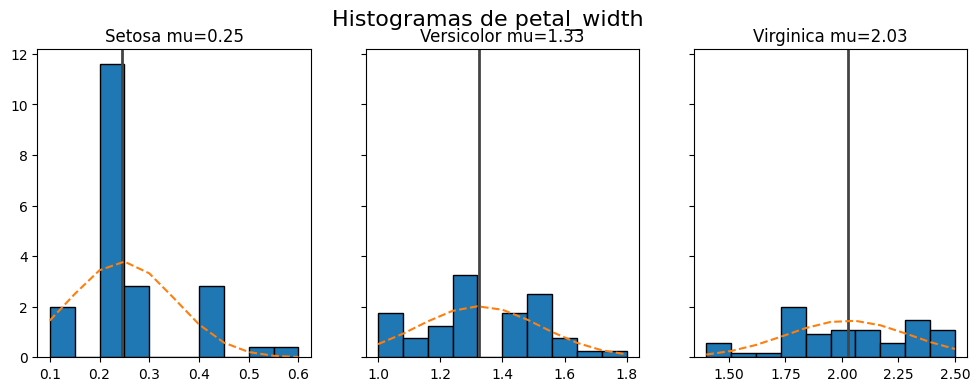

In [23]:
for feature in features.columns.tolist():
    plot_hists(data, 'target', feature, 10)

In [24]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [29]:
# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Analisis de componentes principales
pca = PCA(n_components=3)
pca.fit(scaled_data)

PCA(n_components=3)

In [30]:
print(pca.components_)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]]


In [31]:
print(pca.explained_variance_)

[2.93808505 0.9201649  0.14774182]


In [32]:
transformed = pca.transform(scaled_data)

print(transformed.shape)

transformed

(150, 3)


array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ],
       [-2.07563095,  1.48917752,  0.02696829],
       [-2.44402884,  0.0476442 ,  0.3354704 ],
       [-2.23284716,  0.22314807, -0.0886955 ],
       [-2.33464048, -1.11532768,  0.14507686],
       [-2.18432817, -0.46901356, -0.25376557],
       [-2.1663101 ,  1.04369065, -0.2686811 ],
       [-2.32613087,  0.13307834,  0.09375924],
       [-2.2184509 , -0.72867617, -0.23091124],
       [-2.6331007 , -0.96150673,  0.18079608],
       [-2.1987406 ,  1.86005711, -0.472901  ],
       [-2.26221453,  2.68628449,  0.03052661],
       [-2.2075877 ,  1.48360936, -0.00534409],
       [-2.19034951,  0.48883832, -0.04421532],
       [-1.898572  ,  1.40501879, -0.37434327],
       [-2.34336905,  1.12784938,  0.13263047],
       [-1.914323  ,  0.40885571, -0.421

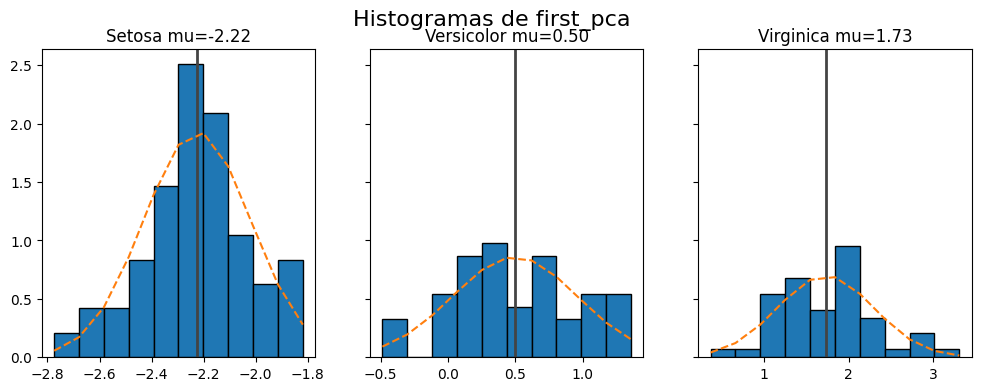

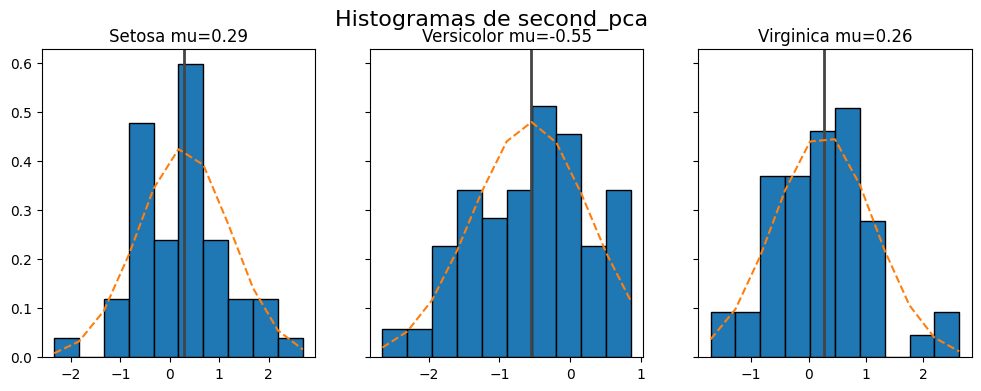

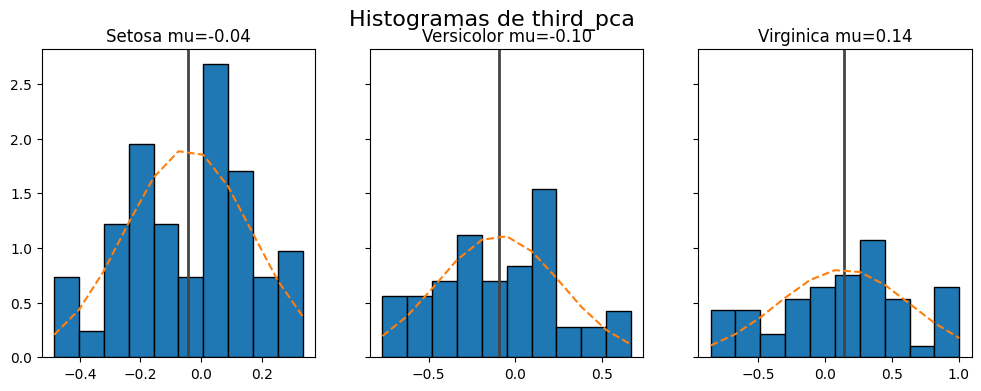

In [35]:
transformed_df = pd.DataFrame({'first_pca': transformed[:, 0], 'second_pca': transformed[:, 1], 'third_pca': transformed[:, 2]})

transformed_df = transformed_df.join(data['target'])

for column in transformed_df.columns[:-1]:
    plot_hists(transformed_df, 'target', column, 10)


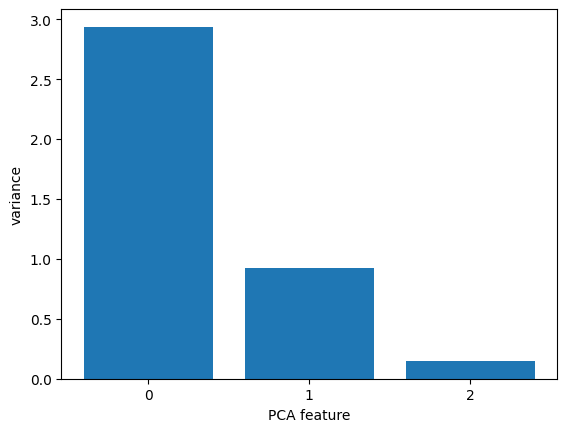

In [42]:
features_pca = range(pca.n_components_)
plt.bar(features_pca, pca.explained_variance_)
plt.xticks(features_pca)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

### Reducción de dimensionalidad con PCA

- Las variables del PCA esta en orden decreciente de varianza
- Las variables con poca varianza son "ruido"
- Las variables con mucha varianza son las que tienen mayor capacidad explicativa

![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/2390268977.png)

https://www.kaggle.com/code/lnexpe/iris-pca-visualization-in-3d

In [45]:
features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


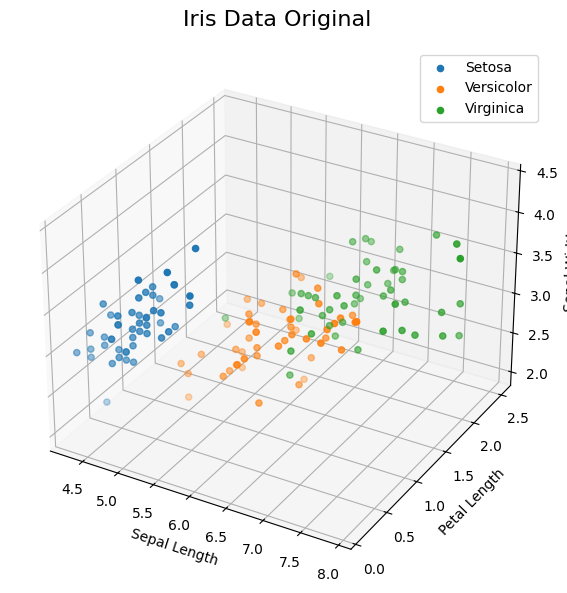

In [48]:
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')

# Axis labels
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Sepal Width')

for i in data['target'].unique().tolist():
    spec = data[data['target']==i]
    xdata = spec['sepal_length']
    zdata = spec['sepal_width']
    ydata = spec['petal_width']
    ax.scatter3D(xdata, ydata, zdata, label=i)
    
ax.legend()
plt.suptitle('Iris Data Original', fontsize=16)
plt.tight_layout()
plt.show()


In [50]:
df_for_pca_graphic = transformed_df.copy()
df_for_pca_graphic['species'] = data['target']

In [276]:
transformed_df

,first_pca,second_pca,third_pca,species
0,-2.264703,0.480027,-0.127706,Virginica
1,-2.080961,-0.674134,-0.234609,Virginica
2,-2.364229,-0.341908,0.044201,Virginica
3,-2.299384,-0.597395,0.091290,Virginica
4,-2.389842,0.646835,0.015738,Virginica
...,...,...,...,...
145,1.870503,0.386966,0.256274,Versicolor
146,1.564580,-0.896687,-0.026371,Versicolor
147,1.521170,0.269069,0.180178,Versicolor
148,1.372788,1.011254,0.933395,Versicolor


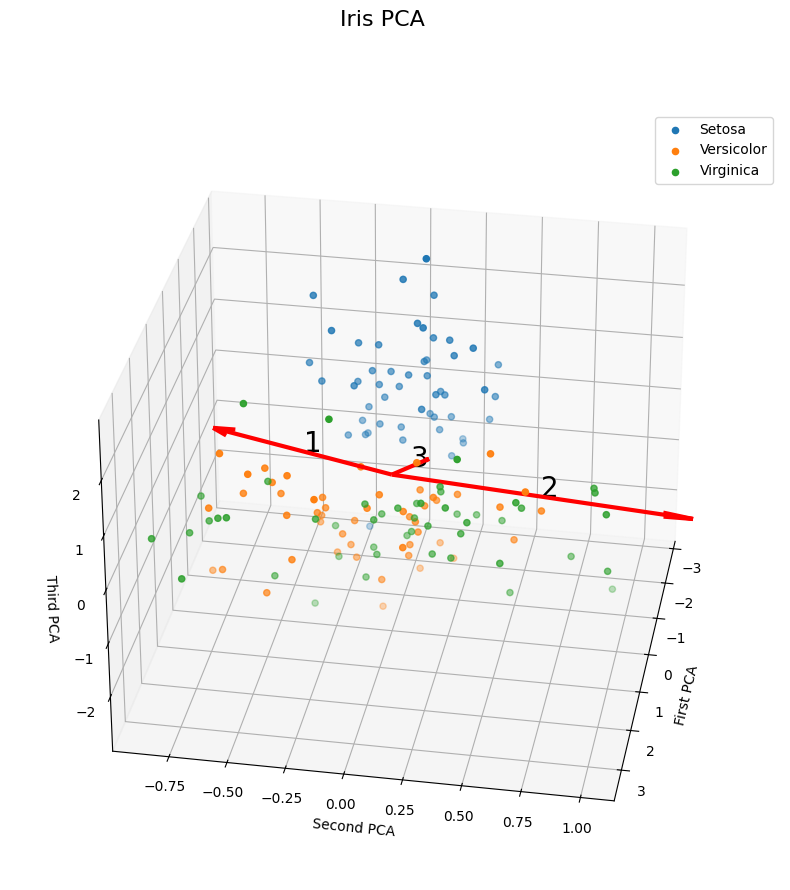

In [52]:
# Assuming that PCA is already fitted and model.components_ is available
# You might have to adjust these lines based on how you performed PCA
mean = transformed_df[['first_pca', 'second_pca', 'third_pca']].mean(axis=0)

# 3D Plot
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

#Rotate the graph
ax.view_init(30, 10)

# Plot the data points
for i in transformed_df['target'].unique():
    spec = transformed_df[transformed_df['target']==i]
    xdata = spec['first_pca']
    zdata = spec['second_pca']
    ydata = spec['third_pca']
    ax.scatter3D(xdata, ydata, zdata, label=i)

# Assuming mean and pca are defined and model has been fitted.
for idx, (length, vector) in enumerate(zip(pca.explained_variance_, pca.components_)):
    v = vector * 3 * np.sqrt(length)/2  # Adjust the length of the arrow
    ax.quiver(mean[0], mean[1], mean[2], v[0], v[1], v[2], color='red', arrow_length_ratio=0.1, linewidth=3.0)
    
    # Annotate the arrow
    ax.text(mean[0] + v[0]/2, mean[1] + v[1]/2, mean[2] + v[2]/2, str(idx+1), color='black', size=20)
    
# Labels
ax.set_xlabel('First PCA')
ax.set_ylabel('Second PCA')
ax.set_zlabel('Third PCA')
ax.legend()
plt.suptitle('Iris PCA', fontsize=16)

plt.show()


![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/3116619178.png)

In [55]:
scaled_data_with_target = pd.DataFrame(scaled_data, columns=features.columns.tolist())

scaled_data_with_target['target'] = data['target']

scaled_data_with_target.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.900681,1.019004,-1.340227,-1.315444,Setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,Setosa
2,-1.385353,0.328414,-1.397064,-1.315444,Setosa
3,-1.506521,0.098217,-1.283389,-1.315444,Setosa
4,-1.021849,1.249201,-1.340227,-1.315444,Setosa


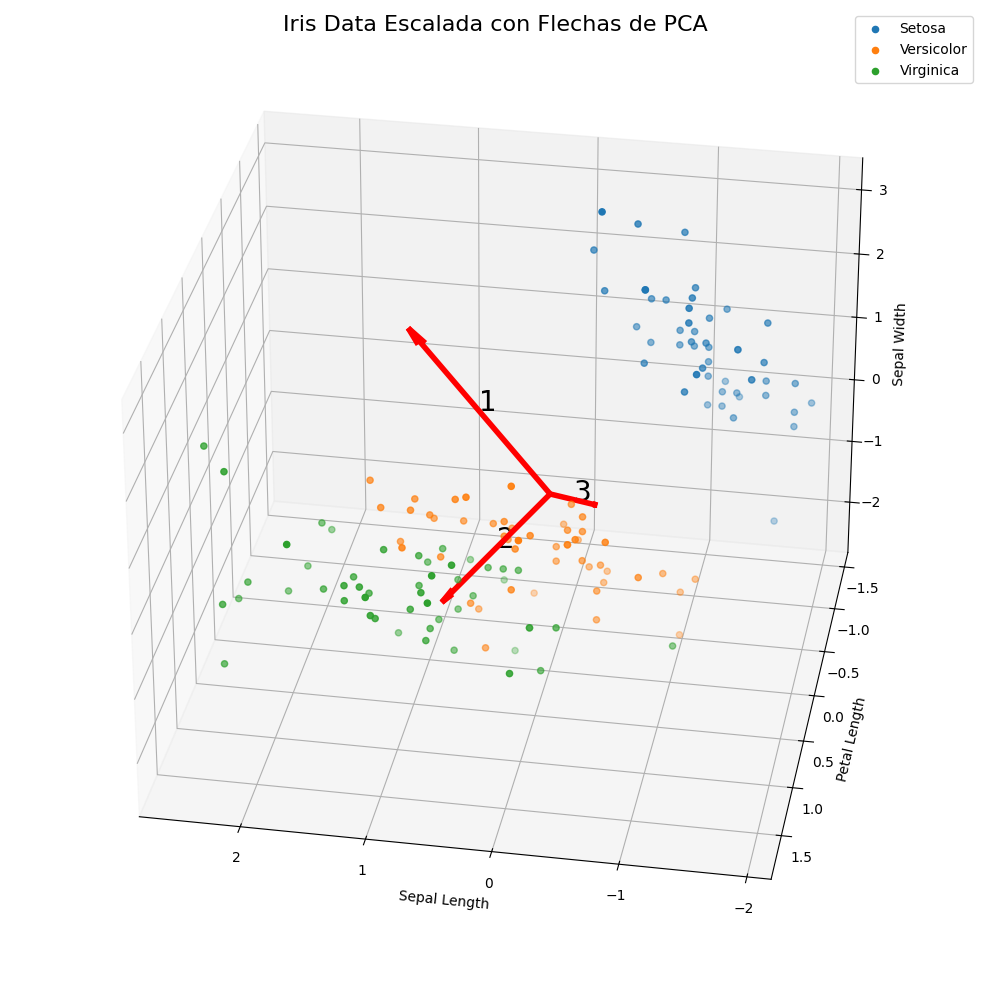

In [65]:
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

mean = transformed_df[['first_pca', 'second_pca', 'third_pca']].mean(axis=0)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Set the view angle
ax.view_init(elev=30, azim=100)  # 20,30 - 0,90 - 10,180

# Axis labels
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Sepal Width')

for i in scaled_data_with_target['target'].unique():
    spec = scaled_data_with_target[scaled_data_with_target['target']==i]
    xdata = spec['sepal_length']
    zdata = spec['sepal_width']
    ydata = spec['petal_width']
    ax.scatter3D(xdata, ydata, zdata, label=i)

# Assuming mean and pca are defined and model has been fitted.
for idx, (length, vector) in enumerate(zip(pca.explained_variance_, pca.components_)):
    v = vector * 3 * np.sqrt(length)/2  # Adjust the length of the arrow
    ax.quiver(mean[0], mean[1], mean[2], v[0], v[1], v[2], color='red', arrow_length_ratio=0.1, linewidth=4.0)
    
    # Annotate the arrow
    ax.text(mean[0] + v[0]/2, mean[1] + v[1]/2, mean[2] + v[2]/2, str(idx+1), color='black', size=20)
    
ax.legend()
plt.tight_layout()
plt.suptitle('Iris Data Escalada con Flechas de PCA', fontsize=16)
plt.show()


### `Reduccion de dimensionalidad ≠ Feature selection`

En reducción de dimensionalidad con PCA, agarramos multiples variables y las "codificamos" en nuevas variables que resumen esta información. En el fondo, la variable "first_pca" es la que "resume" la mayor cantidad de varianza. 

Recuerden que a mayor varianza, mayor información.
Por ejemplo, si tuvieramos 50 alumnos, y todos sacan 10, no hay demasiada información individual sobre cada alumno con ese dato. En cambio si las notas varian entre 1 y 10, tenemos información individual sobre cada alumno que nos sirve como información. 

La clave es separar el ruido de lo importante
Y nos quedamos solo con los componentes principales que captan la mayor cantidad de varianza. 

### ¿Sirve de algo?

Tratemos de clasificar las flores con 1 solo componente principal, 2 componentes, y con las 4 variables originales y las 4 variables normalizadas y comparemos métricas. 

![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/7104743922.png)


Aca ponemos solo la info que aporta nuestro PCA 1, en conjunto con los labels. 

In [59]:
transformed_df.head()

pca_data = transformed_df.copy()

pca_data['target'] = transformed_df['target'].astype('category').cat.codes

pca_1 = pca_data[['first_pca', 'target']]

pca_2 = pca_data[['first_pca','second_pca', 'target']]

pca_1.head()

,first_pca,target
0,-2.264703,0
1,-2.080961,0
2,-2.364229,0
3,-2.299384,0
4,-2.389842,0


Aca ponemos solo la info que aporta nuestro PCA 1 y 2, en conjunto con los labels. 

In [60]:
pca_2.head()

,first_pca,second_pca,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


Aca ponemos solo la data normalizada

In [61]:
normalized_data = scaled_data_with_target.copy()

normalized_data['target'] = scaled_data_with_target['target'].astype('category').cat.codes

normalized_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


Aca traemos nuestros datos originales

In [62]:
raw_data = data.copy()

raw_data.drop('target', axis=1, inplace=True)

raw_data['target'] = data['target'].astype('category').cat.codes

raw_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Ponemos los 4 dataframes en una lista

In [63]:
datasets_list = [raw_data, normalized_data, pca_1, pca_2]

Ahora hacemos una regresión logística, con cada uno de los datasets. 

Para ver que tanto sirven los PCA y comparado con el dataset escalado y el dataset original

Es probable que en este dataset el escalado y el dataset original den igual, ya que todas las unidades de medidas (las 4 columnas features)

/Users/maico/miniconda3/envs/unl/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


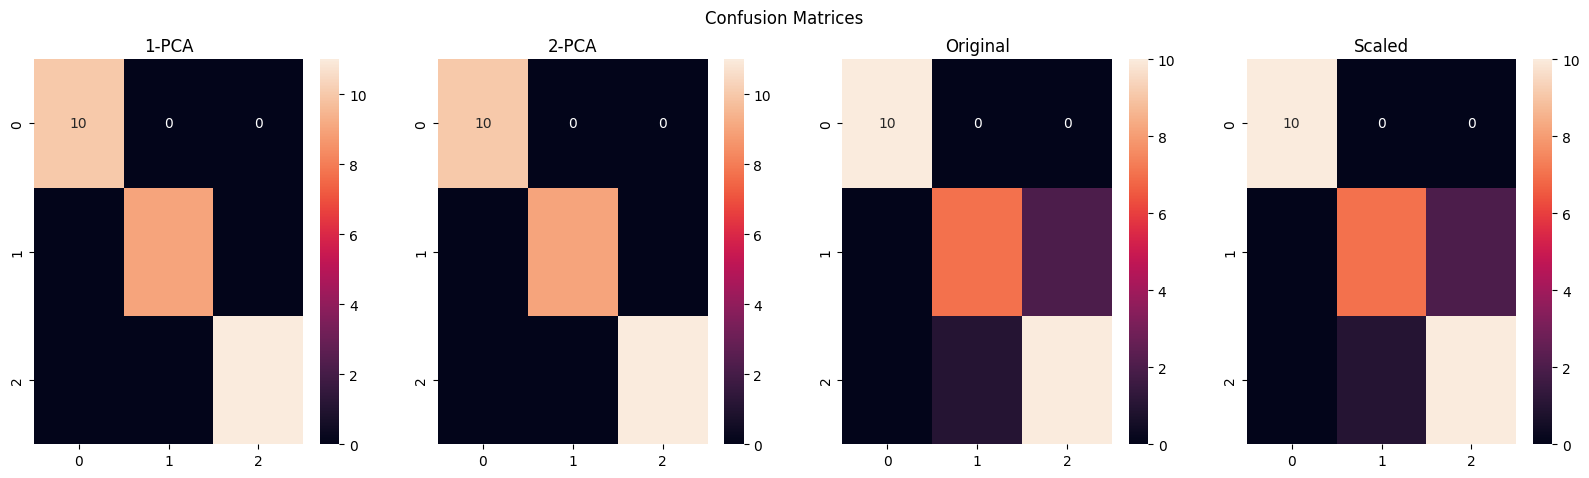

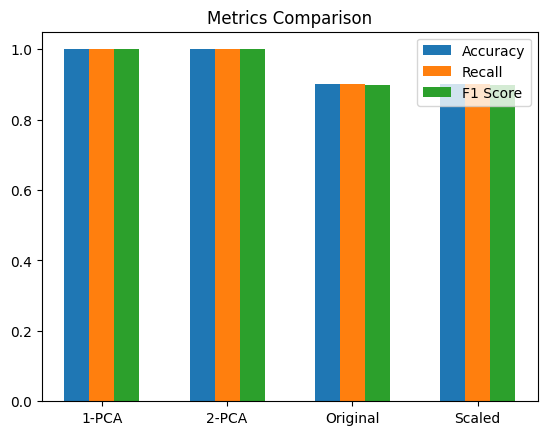

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming datasets_list contains the four datasets
dataset_names = ['1-PCA', '2-PCA', 'Original', 'Scaled']
confusion_matrices = []
metrics = []

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Confusion Matrices')

for i, (df, name) in enumerate(zip(datasets_list, dataset_names)):
    X = df.drop(columns=['target'])  # Assuming 'target' is the name of your target variable
    y = df['target']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Logistic regression
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    
    sns.heatmap(cm, annot=True, fmt='g', ax=axs[i])
    axs[i].set_title(name)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics.append((acc, rec, f1))

# Plotting metrics
fig, ax = plt.subplots()
labels = ['Accuracy', 'Recall', 'F1 Score']
metrics_arr = np.array(metrics).T  # Transpose to make it easier to plot

x = np.arange(len(dataset_names))
width = 0.2

for i, (label, metric_values) in enumerate(zip(labels, metrics_arr)):
    ax.bar(x + i * width, metric_values, width, label=label)

ax.set_xticks(x + width)
ax.set_xticklabels(dataset_names)
ax.set_title('Metrics Comparison')
ax.legend()

plt.show()
